#📌 Урок: Визуализация данных с помощью Pandas и Matplotlib
# 📖 Теоретический минимум
## 🔹 Основные библиотеки визуализации
Matplotlib - базовая библиотека для создания статических, анимированных и интерактивных визуализаций

Pandas - встроенные методы визуализации на основе Matplotlib

Seaborn - библиотека для создания статистических графиков (работает поверх Matplotlib)

## 🔹 Типы графиков и их применение
Линейные графики - тенденции изменения во времени

Столбчатые диаграммы - сравнение категориальных данных

Круговые диаграммы - доли составных частей

Гистограммы - распределение данных

Точечные диаграммы - взаимосвязь между двумя переменными

## 🔹 Основные принципы хорошей визуализации
Простота и ясность

Правильный выбор типа графика

Адекватные подписи и легенда

Оптимальное использование цвета

Отсутствие визуального шума


## 📖 Материалы

https://vkvideo.ru/video-194554202_456239677

https://vkvideo.ru/playlist/-16108331_55984952








In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Загрузка данных из файла Excel
url = 'https://docs.google.com/spreadsheets/d/1y9ekfl_0NOFLQtwqzXcJdijcMqquSDUn_XqtW-S7R3Q/export?format=xlsx'

# Чтение листов в два отдельных DataFrame
reservoir_df = pd.read_excel(url, sheet_name='Reservoir', index_col=False)
wells_df = pd.read_excel(url, sheet_name='Wells', index_col=False, names=['date',	'field_id',	'well_id', 'oil',	'gas',	'water'])

In [3]:
reservoir_df

,date,field_id,well_id,reserves,pressure,oil_density
0,2020-01-01,Старое,1,5428,189,860
1,2020-01-01,Старое,2,5234,193,860
2,2020-01-01,Старое,3,5142,180,860
3,2020-01-01,Старое,3а,5341,180,860
4,2020-01-01,Старое,5,5381,191,860
5,2020-01-01,Новое,1,12734,350,730
6,2020-01-01,Новое,2,15735,350,730
7,2020-01-01,Новое,3,14263,350,730


In [4]:
wells_df = wells_df.dropna()
wells_df
wells_df

,date,field_id,well_id,oil,gas,water
0,2021-07-01 00:00:00,Новое,1,128.048011,0,0.000000
1,2024-08-01 00:00:00,Старое,1,2.553258,14.42423,274.737692
2,2022-09-01 00:00:00,Старое,3а,0.982410,25.353305,182.408922
3,2023-11-01 00:00:00,Старое,3а,0.754156,25.149471,228.776968
4,2020-04-01 00:00:00,Новое,1,167.177177,0,0.000000
...,...,...,...,...,...,...
919,2023-11-01 00:00:00,Новое,1,70.296660,0,0.000000
920,2022-07-01 00:00:00,Старое,3а,1.140113,24.17841,181.145298
921,2024-01-01 00:00:00,Старое,5,1.957010,85.242499,227.324250
922,2021-04-01 00:00:00,Новое,3,151.104133,0,0.000000



# 🏆 Задания

## 1️⃣ Линейный график динамики добычи нефти
**Задача:**
 Напишите функцию принимающую месторождение и имя скважины и формирующую график добычи нефти по годам

In [5]:
def production_field_and_well_date_plot(field_id, well_id):

    plot_data = wells_df[(wells_df['field_id'] == field_id) & (wells_df['well_id'] == well_id)]
    plot_data = plot_data.sort_values(['date'])

    plt.figure(figsize=(12,8))
    plt.plot(plot_data['date'], plot_data['oil'], marker='o', markersize=4, color = 'g')
    plt.title('График добычи нефти по годам')
    plt.grid()
    plt.xlabel('Добыча')
    plt.ylabel('Время')


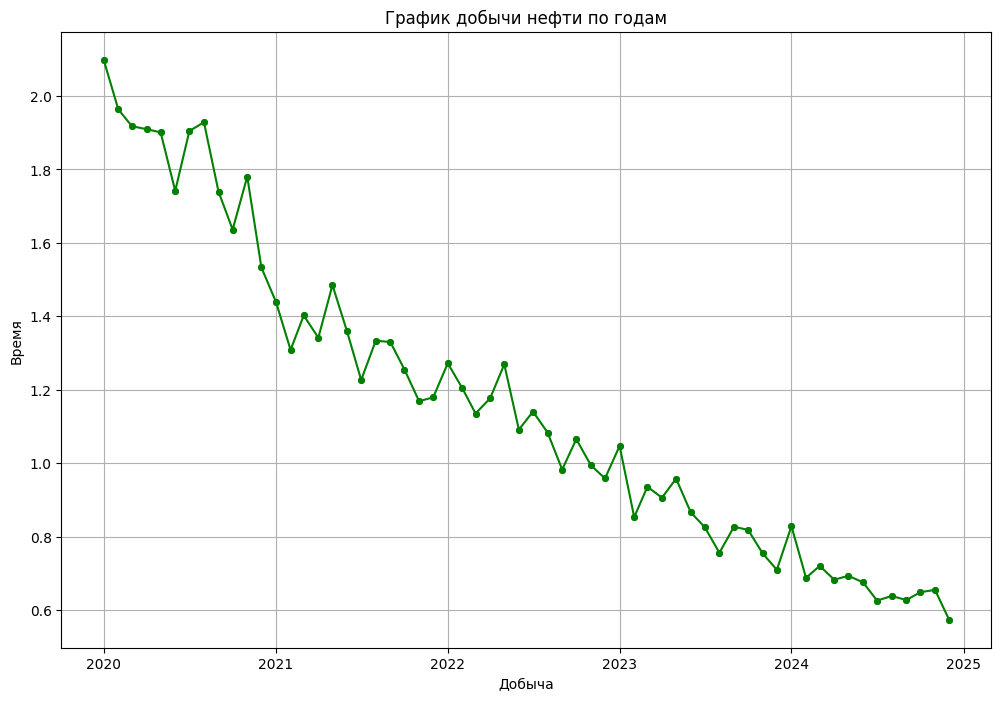

In [6]:
production_field_and_well_date_plot('Старое', '3а')


## 2️⃣ Столбчатая диаграмма

**Задача:**

Напишите функцию формирующую cравнение добычи по месторождениям (столбчатая диаграмма)




In [7]:
def production_fields_bar():
    grouped = wells_df.groupby(['field_id'])[['oil', 'gas', 'water']].sum()
    
    grouped.plot(kind='bar', figsize=(12, 8))

    plt.title('Добыча по месторождениям')
    plt.xlabel('Тип месторождения')
    plt.ylabel('Суммарная добыча')
    plt.tight_layout()
    plt.grid()
    plt.legend()
    plt.show()


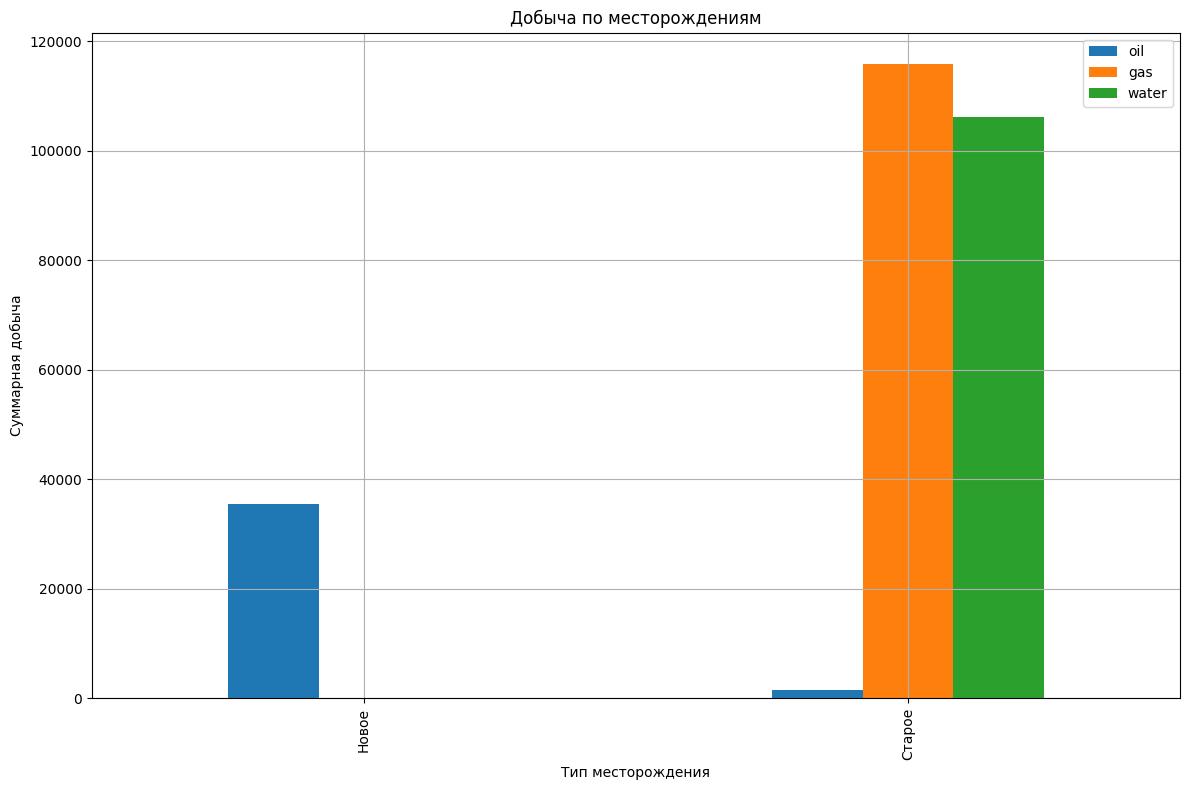

In [8]:
production_fields_bar()

## 3️⃣  Круговая диаграмма
**Задача:**Напишите функцию формирующую визуализацию накопленной добычи нефти по скважинам одного месторождения (круговая диаграмма)

---



In [9]:
group_by_well = wells_df.groupby('well_id')['oil'].sum()
group_by_well

well_id
1     12927.941225
2      9304.974146
3     14291.103495
5       348.854133
3а      139.101335
Name: oil, dtype: float64

In [10]:
field_id = 'Старое'
field = wells_df[wells_df['field_id'] == field_id]

field

,date,field_id,well_id,oil,gas,water
1,2024-08-01 00:00:00,Старое,1,2.553258,14.42423,274.737692
2,2022-09-01 00:00:00,Старое,3а,0.982410,25.353305,182.408922
3,2023-11-01 00:00:00,Старое,3а,0.754156,25.149471,228.776968
5,2020-03-01 00:00:00,Старое,3,4.562940,709.988492,100.339071
6,2022-07-01 00:00:00,Старое,1,4.074363,15.217789,167.766077
...,...,...,...,...,...,...
914,2020-02-01 00:00:00,Старое,2,2.815401,58.123491,98.127133
916,2021-09-01 00:00:00,Старое,1,4.534933,16.155841,145.506995
917,2020-09-01 00:00:00,Старое,3,4.152849,837.806504,118.773936
920,2022-07-01 00:00:00,Старое,3а,1.140113,24.17841,181.145298


In [11]:
group_by_well = field.groupby('well_id')['oil'].sum()
group_by_well

well_id
1     523.071247
2     211.865714
3     350.636573
5     348.854133
3а    139.101335
Name: oil, dtype: float64

In [12]:
def field_wells_production_pie(field_id):

    field = wells_df[wells_df['field_id'] == field_id]
    group_by_well = field.groupby('well_id')['oil'].sum()
    
    plt.figure(figsize=(12,8))
    plt.pie(group_by_well, labels=field['well_id'].unique(), autopct="%.1f%%", colors=plt.cm.Paired.colors)
    plt.title(f'Распределение добычи нефти по скважинам месторождения {field_id}')
    plt.show()

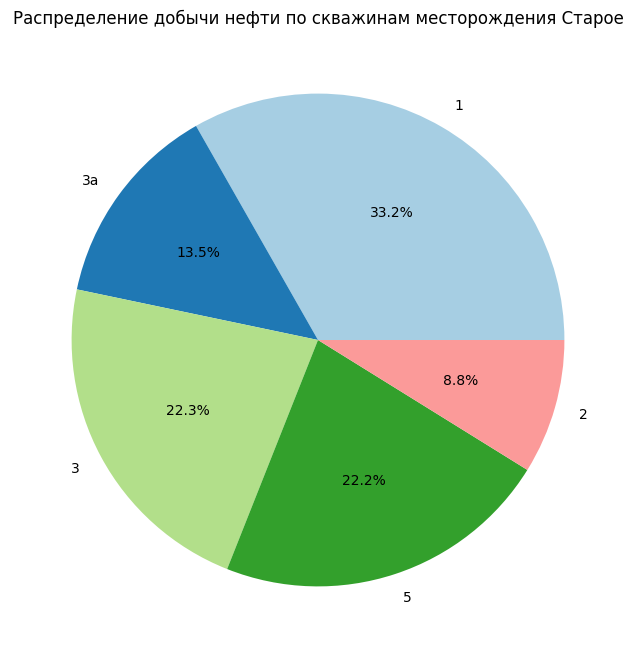

In [13]:
field_wells_production_pie('Старое')


## 4️⃣   Tornado plot


**Задача:**  Постройте tornado plot для визуализации накопленной добычи жидкости для каждой скважины.
---




In [14]:
field = wells_df[wells_df['field_id'] == field_id]
group_by_well = field.groupby('well_id')[['oil', 'water']].sum().reset_index()
group_by_well['q_liquid'] = group_by_well['oil']  + group_by_well['water']

data = group_by_well.sort_values('q_liquid')

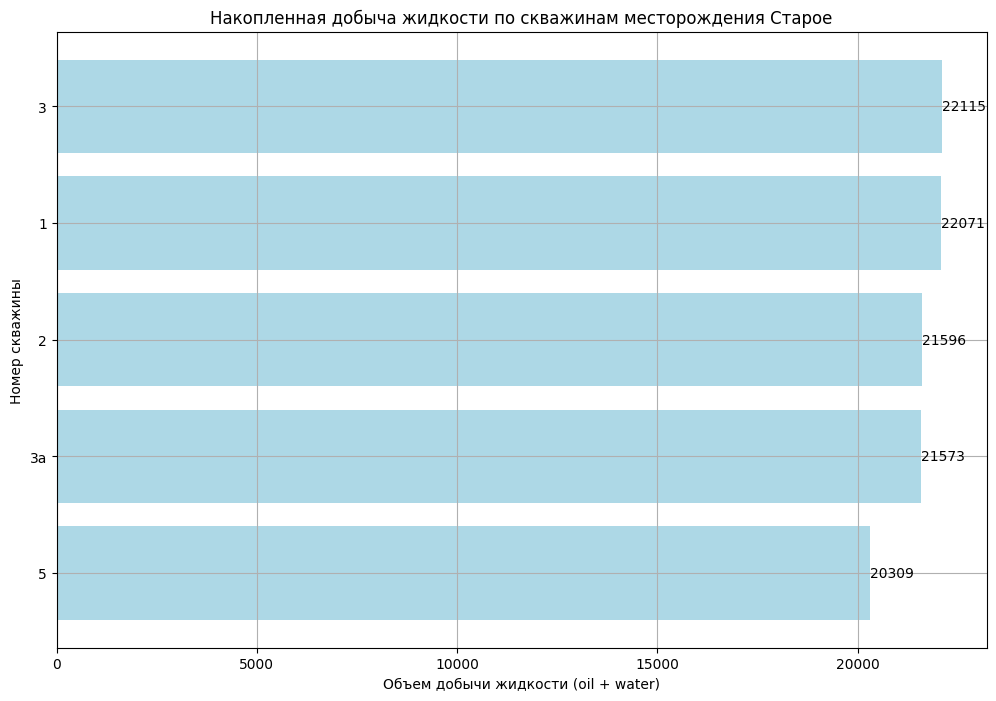

In [15]:
def field_wells_production_barh(field_id):

    field = wells_df[wells_df['field_id'] == field_id]
    group_by_well = field.groupby('well_id')[['oil', 'water']].sum().reset_index()
    group_by_well['q_liquid'] = group_by_well['oil'] + group_by_well['water']

    data = group_by_well.sort_values('q_liquid')

    plt.figure(figsize=(12, 8))
    plt.barh(data['well_id'].astype(str), data['q_liquid'], color='lightblue')
    plt.title(f'Накопленная добыча жидкости по скважинам месторождения {field_id}')
    plt.grid()
    plt.xlabel('Объем добычи жидкости (oil + water)')
    plt.ylabel('Номер скважины')

    for y, x in enumerate(data['q_liquid']):
        plt.text(x,
                 y,
                 f'{x:.0f}',
                 va='center')

field_wells_production_barh('Старое')


## 5️⃣ 3D визуализации
**Задача:**

Создайте изображение в 3D для отображения каждой скважины в осях накопленный дебит нефти, газа, воды

---


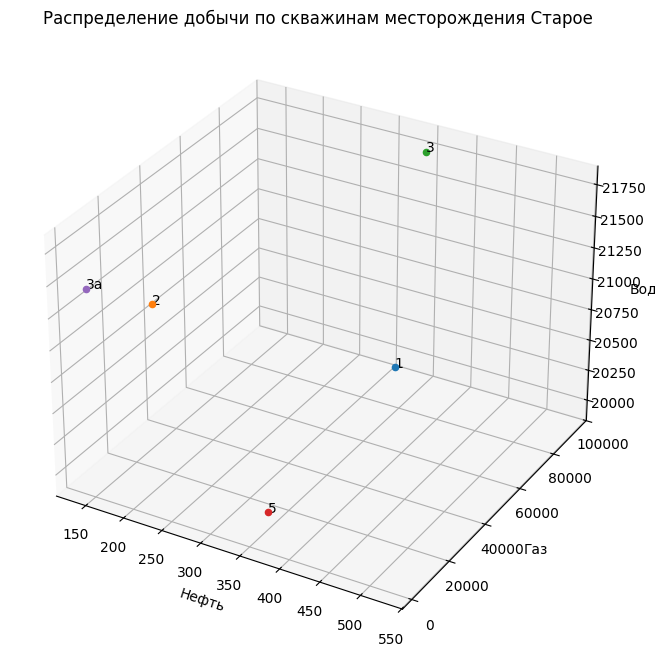

In [33]:
def production_3d_plot(field_id):
    field = wells_df[wells_df['field_id'] == field_id]
    group_by_well = field.groupby('well_id')[['oil', 'gas', 'water']].sum().reset_index()

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    oil = group_by_well['oil']
    gas = group_by_well['gas']
    water = group_by_well['water']

    # ax.scatter(oil, gas, water, marker='o')

    for i, well_id in enumerate(group_by_well['well_id']):
        ax.scatter(oil[i], gas[i], water[i], marker='o', label=group_by_well['well_id'])
        ax.text(oil[i], gas[i], water[i], str(well_id), size=10)

    ax.set_xlabel('Нефть')
    ax.set_ylabel('Газ')
    ax.set_zlabel('Вода')
    ax.set_title(f'Распределение добычи по скважинам месторождения {field_id}')

production_3d_plot('Старое')

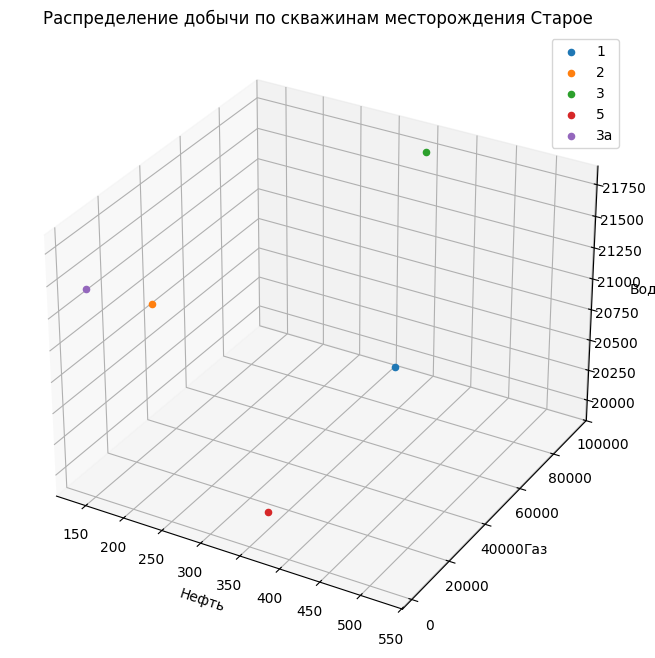

In [32]:
def production_3d_plot(field_id):
    field = wells_df[wells_df['field_id'] == field_id]
    group_by_well = field.groupby('well_id')[['oil', 'gas', 'water']].sum().reset_index()    

    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    for _, value in group_by_well.iterrows():
        ax.scatter(value['oil'], value['gas'], value['water'], marker='o', label=value['well_id'])

    ax.set_xlabel('Нефть')
    ax.set_ylabel('Газ')
    ax.set_zlabel('Вода')
    ax.set_title(f'Распределение добычи по скважинам месторождения {field_id}')
    ax.legend()

production_3d_plot('Старое')